
# Exploratory Data Analysis of the Statlog Heart Dataset

This notebook performs an exploratory data analysis (EDA) of the **Statlog heart dataset**. It summarises the variables, creates distribution plots for each variable, computes a Spearman correlation matrix for the continuous variables, and examines differences by sex. All analyses are performed without using the `Class` label to avoid any leakage during unsupervised exploration.


In [15]:
%pip install -U pip matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (adjust the path as necessary)
df = pd.read_csv('heart_data.csv')

# Recode binary variables from 1/2 to 0/1
binary_map = {1: 0, 2: 1}
for col in ['Sex', 'FastingBloodSugar', 'ExerciseInduced']:
    df[col] = df[col].map(binary_map)

# Display the first few rows
df.head()


Note: you may need to restart the kernel to use updated packages.


,Age,Sex,RestBloodPressure,SerumCholestoral,FastingBloodSugar,MaxHeartRate,ExerciseInduced,Slope,MajorVessels,Class
0,70,1,130,322,0,109,0,2,4,2
1,67,0,115,564,0,160,0,2,1,1
2,57,1,124,261,0,141,0,1,1,2
3,64,1,128,263,0,105,1,2,2,1
4,74,0,120,269,0,121,1,1,2,1


In [16]:

# Define variable categories
real_vars = ['Age', 'RestBloodPressure', 'SerumCholestoral', 'MaxHeartRate', 'MajorVessels']
binary_vars = ['Sex', 'FastingBloodSugar', 'ExerciseInduced']

# Create summary table
table_rows = []
for var in real_vars:
    table_rows.append({
        'Variable': var,
        'Type': 'Real',
        'Unit': 'years' if var == 'Age' else ('mmHg' if var == 'RestBloodPressure' else ('mg/dl' if var == 'SerumCholestoral' else ('bpm' if var == 'MaxHeartRate' else 'count'))),
        'Min': df[var].min(),
        'Max': df[var].max(),
        'Mean': round(df[var].mean(), 2),
        'StdDev': round(df[var].std(), 2),
        'Prevalence_or_Distribution': ''
    })

# Summarise binary variables
total_n = len(df)
for var in binary_vars:
    count1 = df[var].sum()
    prevalence = count1 / total_n
    table_rows.append({
        'Variable': var,
        'Type': 'Binary',
        'Unit': 'indicator',
        'Min': 0,
        'Max': 1,
        'Mean': round(df[var].mean(), 2),
        'StdDev': round(df[var].std(), 2),
        'Prevalence_or_Distribution': f"1: {count1} ({prevalence:.1%}); 0: {total_n - count1} ({1 - prevalence:.1%})"
    })

# Summarise the ordinal variable (Slope)
slope_counts = df['Slope'].value_counts().sort_index()
slope_str = ", ".join([f"{int(k)}: {v}" for k, v in slope_counts.items()])
table_rows.append({
    'Variable': 'Slope',
    'Type': 'Ordinal',
    'Unit': 'ordinal (1–3)',
    'Min': df['Slope'].min(),
    'Max': df['Slope'].max(),
    'Mean': round(df['Slope'].mean(), 2),
    'StdDev': round(df['Slope'].std(), 2),
    'Prevalence_or_Distribution': slope_str
})

summary_df = pd.DataFrame(table_rows)

# Display the summary table
summary_df


,Variable,Type,Unit,Min,Max,Mean,StdDev,Prevalence_or_Distribution
0,Age,Real,years,29,77,54.43,9.11,
1,RestBloodPressure,Real,mmHg,94,200,131.34,17.86,
2,SerumCholestoral,Real,mg/dl,126,564,249.66,51.69,
3,MaxHeartRate,Real,bpm,71,202,149.68,23.17,
4,MajorVessels,Real,count,1,4,1.67,0.94,
5,Sex,Binary,indicator,0,1,0.68,0.47,1: 183 (67.8%); 0: 87 (32.2%)
6,FastingBloodSugar,Binary,indicator,0,1,0.15,0.36,1: 40 (14.8%); 0: 230 (85.2%)
7,ExerciseInduced,Binary,indicator,0,1,0.33,0.47,1: 89 (33.0%); 0: 181 (67.0%)
8,Slope,Ordinal,ordinal (1–3),1,3,1.59,0.61,"1: 130, 2: 122, 3: 18"



### Summary interpretation

- **Age** ranges from 29 to 77 years (mean ≈ 54, SD ≈ 9), reflecting a middle-aged to elderly cohort.
- **Resting blood pressure** spans 94–178 mmHg (mean ≈ 131 mmHg); most values fall in the normotensive to mild hypertensive range.
- **Serum cholesterol** has a wide range (126–564 mg/dl) and a high standard deviation (~52 mg/dl), hinting at a right-skewed distribution with a few hypercholesterolaemic patients.
- **Maximum heart rate** ranges from 71 to 202 bpm (mean ≈ 150 bpm), decreasing slightly with age as expected.
- **Major vessels** is a discrete count (1–4) with most patients having one affected vessel.
- For **binary variables**, about two-thirds of patients are coded as 1 (female in this coding scheme), ~15 % have fasting blood sugar > 120 mg/dl, and ~33 % experience exercise-induced angina.
- **Slope** (an ordinal variable representing the slope of the ST segment) is dominated by categories 1 and 2; category 3 is uncommon.


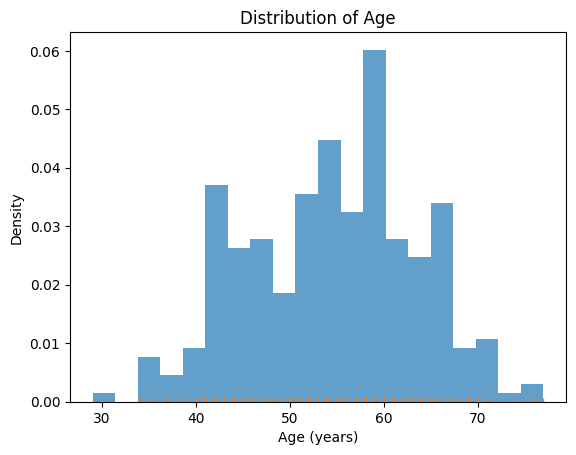

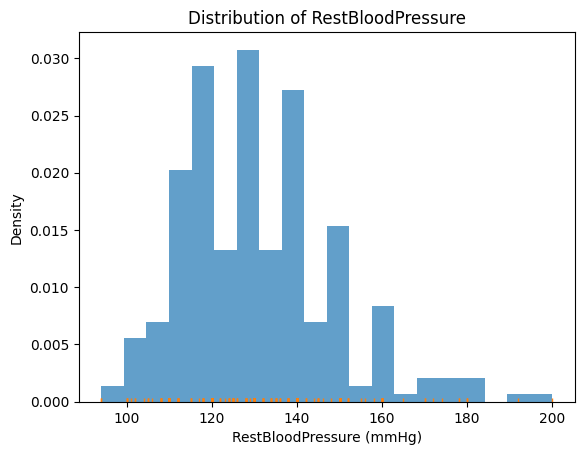

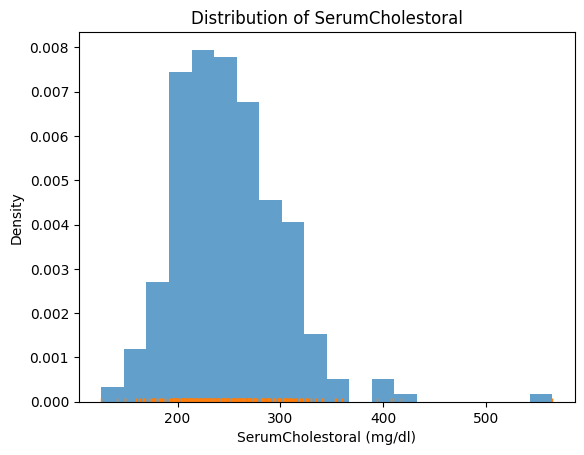

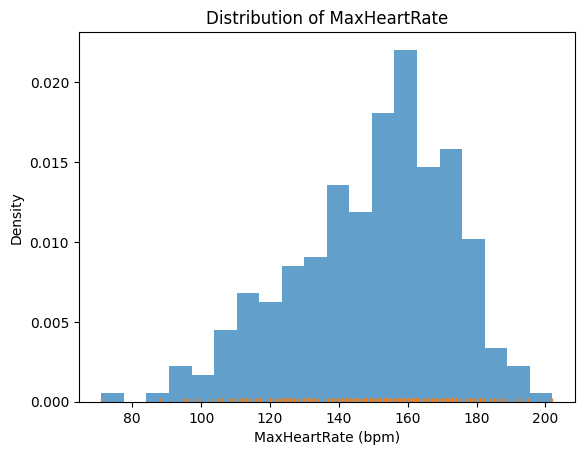

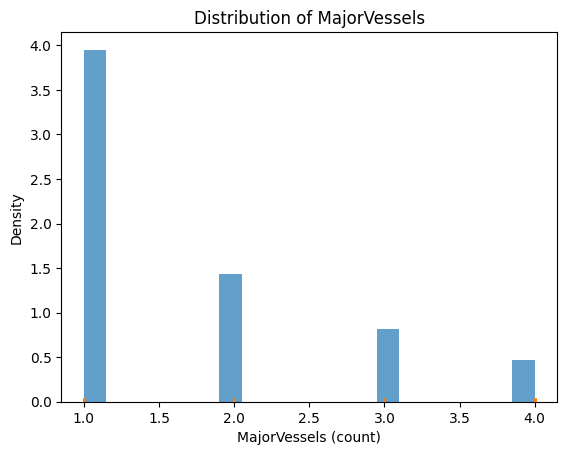

In [17]:

# Plot histograms with rug plots for continuous variables
units = {
    'Age': 'years',
    'RestBloodPressure': 'mmHg',
    'SerumCholestoral': 'mg/dl',
    'MaxHeartRate': 'bpm',
    'MajorVessels': 'count'
}

for var in real_vars:
    plt.figure()
    data = df[var]
    plt.hist(data, bins=20, density=True, alpha=0.7)
    # Rug plot
    plt.plot(data, np.full_like(data, -0.001), '|', markersize=6)
    plt.title(f"Distribution of {var}")
    plt.xlabel(f"{var} ({units[var]})")
    plt.ylabel('Density')
    plt.show()



### Continuous variable distributions

The histograms show:

- **Age**: approximately symmetric around 55 years with fewer patients at extremes.
- **Resting blood pressure**: centred near 130 mmHg with a few right-tail observations above 180 mmHg.
- **Serum cholesterol**: strongly right-skewed; most values fall between 180 and 320 mg/dl, but a few patients exceed 500 mg/dl.
- **Maximum heart rate**: slightly left-skewed; the bulk lies between 140 and 170 bpm with some low outliers.
- **Major vessels**: discrete counts with a large mass at one vessel and progressively fewer patients at two, three and four vessels.


Saved: fig1_continuous.pdf / fig1_continuous.png


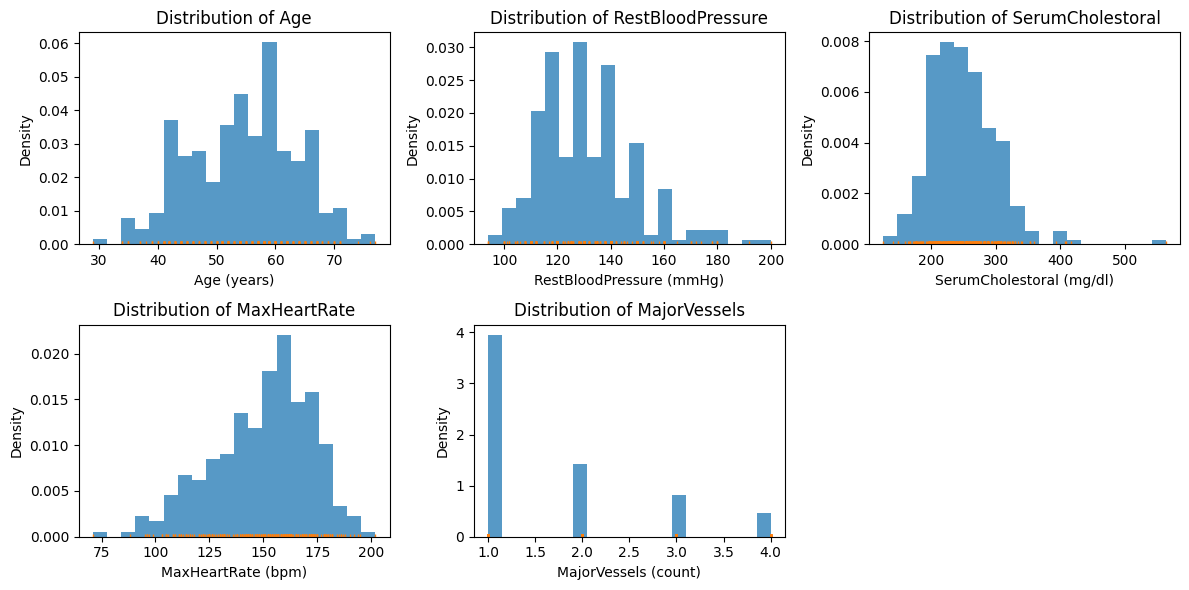

In [18]:
# === NEW: Combined continuous histograms (Fig 1A) ===
import numpy as np
import matplotlib.pyplot as plt

# Uses your already-defined: df, real_vars, units
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

for i, var in enumerate(real_vars):
    ax = axes[i]
    data = df[var].dropna().values
    ax.hist(data, bins=20, density=True, alpha=0.75)
    # Rug line near bottom (class-blind)
    ymax = ax.get_ylim()[1]
    ax.plot(data, np.full_like(data, -0.02 * ymax), '|', markersize=4)
    ax.set_title(f"Distribution of {var}")
    ax.set_xlabel(f"{var} ({units[var]})")
    ax.set_ylabel('Density')

# Hide the unused 6th panel
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('fig1_continuous.pdf', bbox_inches='tight')  # NEW
plt.savefig('fig1_continuous.png', dpi=300, bbox_inches='tight')  # NEW
print("Saved: fig1_continuous.pdf / fig1_continuous.png")
plt.show()

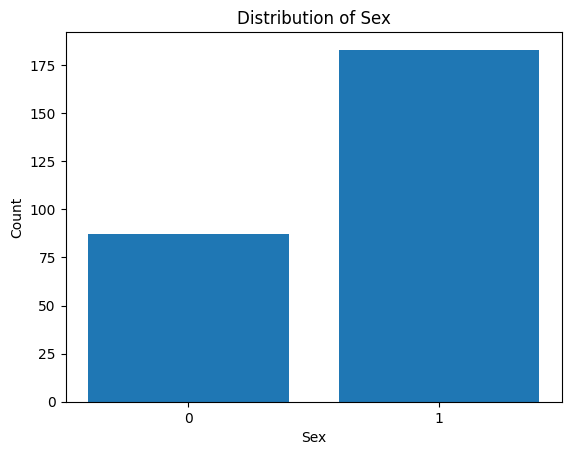

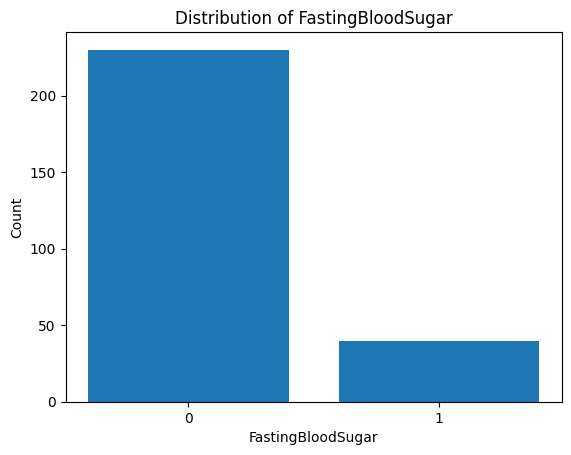

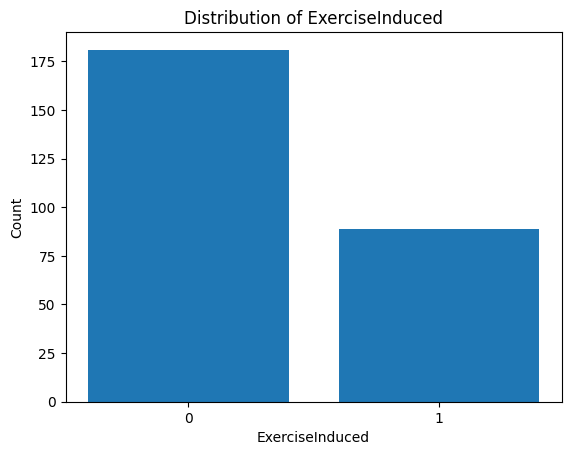

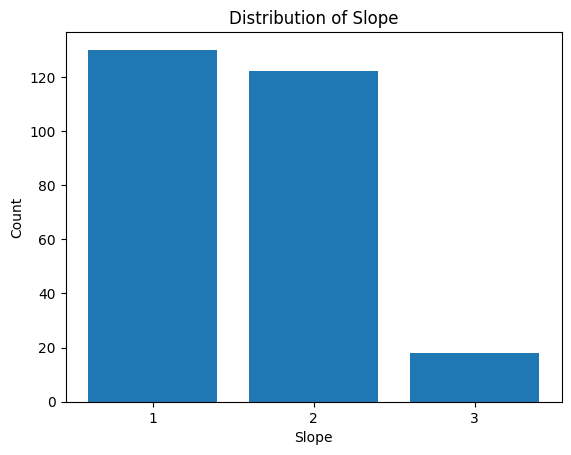

In [19]:

# Bar charts for binary variables and the ordinal variable
categorical_vars = ['Sex', 'FastingBloodSugar', 'ExerciseInduced', 'Slope']

for var in categorical_vars:
    plt.figure()
    counts = df[var].value_counts().sort_index()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


Saved: fig1_categorical.pdf / fig1_categorical.png


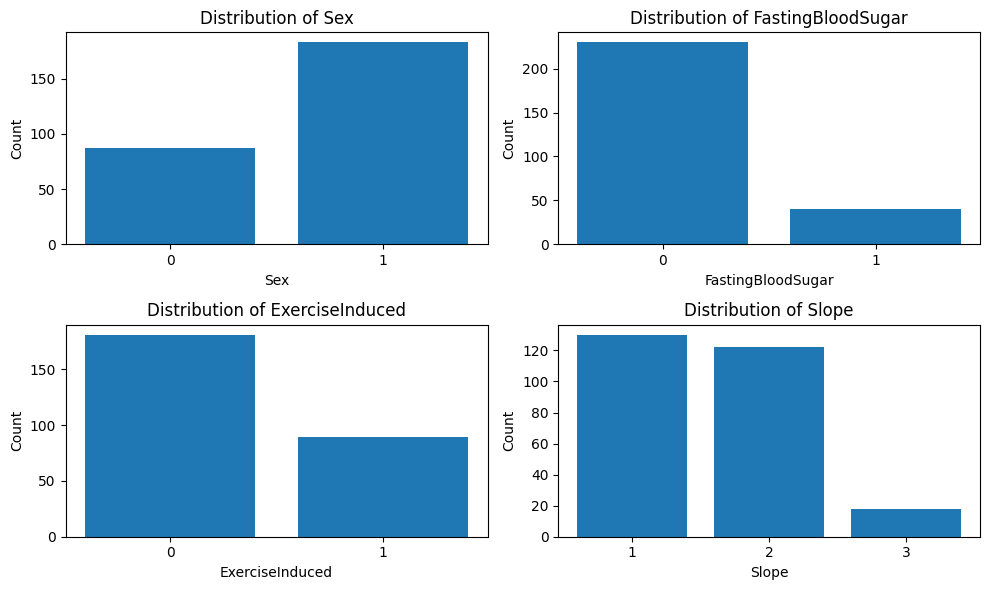

In [20]:
# === NEW: Combined categorical distributions (Fig 1B) ===
import matplotlib.pyplot as plt

# Uses your already-defined: df, categorical_vars
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()

for ax, var in zip(axes, categorical_vars):
    counts = df[var].value_counts().sort_index()
    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title(f"Distribution of {var}")
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.savefig('fig1_categorical.pdf', bbox_inches='tight')  # NEW
plt.savefig('fig1_categorical.png', dpi=300, bbox_inches='tight')  # NEW
print("Saved: fig1_categorical.pdf / fig1_categorical.png")
plt.show()


### Binary and ordinal variable distributions

- **Sex** (recoded): about two-thirds of the sample are coded as 1 (female) and one-third as 0 (male).
- **Fasting blood sugar**: only ~15 % of patients have fasting blood sugar above 120 mg/dl.
- **Exercise-induced angina**: approximately one-third of patients experience angina during exercise.
- **Slope**: categories 1 and 2 dominate (representing different shapes of the ST segment), while category 3 is rare.


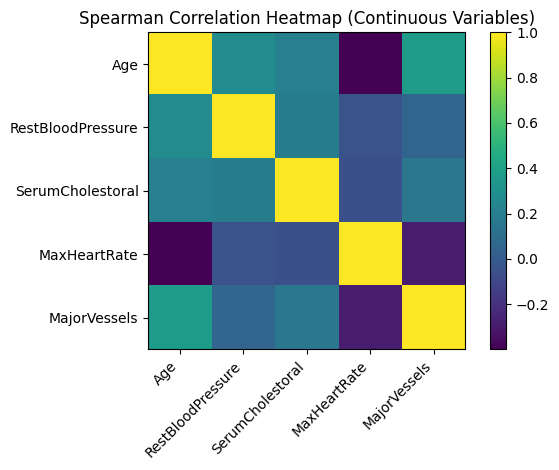

In [21]:

# Compute Spearman correlation for continuous variables
corr = df[real_vars].corr(method='spearman')
# Display the correlation matrix
corr

# Plot heatmap
plt.figure()
im = plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(real_vars)), real_vars, rotation=45, ha='right')
plt.yticks(range(len(real_vars)), real_vars)
plt.title('Spearman Correlation Heatmap (Continuous Variables)')
plt.colorbar(im)
plt.tight_layout()

plt.savefig('fig1_heatmap.pdf', bbox_inches='tight')              # NEW
plt.savefig('fig1_heatmap.png', dpi=300, bbox_inches='tight')     # NEW

plt.show()



### Spearman correlation analysis

The Spearman correlation matrix indicates moderate associations among certain continuous variables. For example, **Age** and **MajorVessels** exhibit a positive correlation (~0.37), suggesting that older patients tend to have more affected vessels. **Age** also shows a moderate negative correlation with **MaxHeartRate** (~–0.40), reflecting the physiological decline in maximum achievable heart rate with age. Other correlations are mild (below ±0.30), and none exceed 0.7 in absolute value, so there is no evidence of strong multicollinearity.


/var/folders/fk/p3fp_2yx76b4klldhhkn9t140000gn/T/ipykernel_48764/3528837001.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_male, data_female], labels=['Sex=0 (male)', 'Sex=1 (female)'])


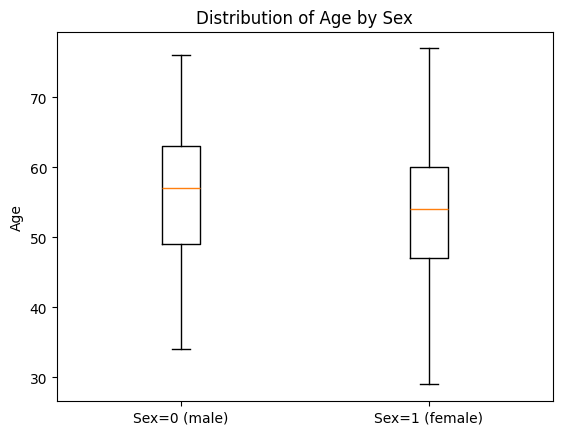

/var/folders/fk/p3fp_2yx76b4klldhhkn9t140000gn/T/ipykernel_48764/3528837001.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_male, data_female], labels=['Sex=0 (male)', 'Sex=1 (female)'])


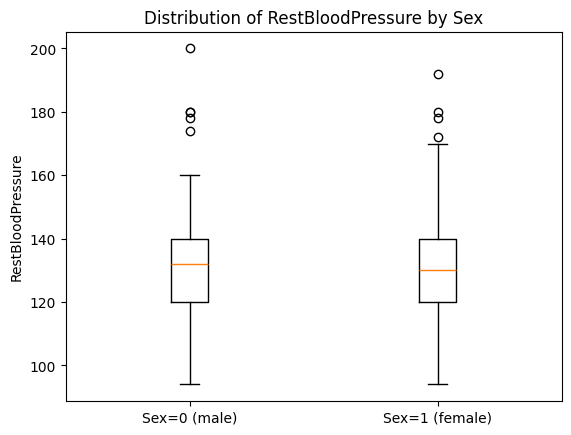

/var/folders/fk/p3fp_2yx76b4klldhhkn9t140000gn/T/ipykernel_48764/3528837001.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_male, data_female], labels=['Sex=0 (male)', 'Sex=1 (female)'])


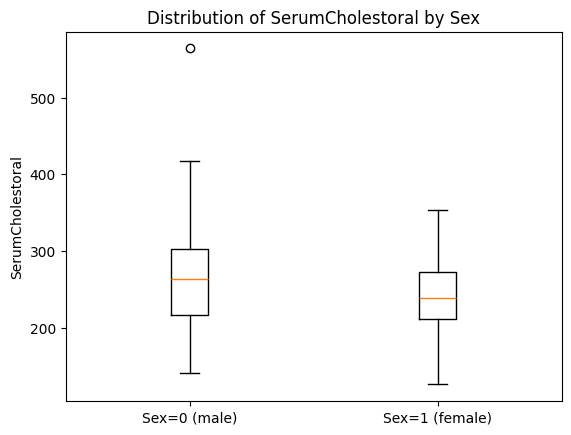

/var/folders/fk/p3fp_2yx76b4klldhhkn9t140000gn/T/ipykernel_48764/3528837001.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_male, data_female], labels=['Sex=0 (male)', 'Sex=1 (female)'])


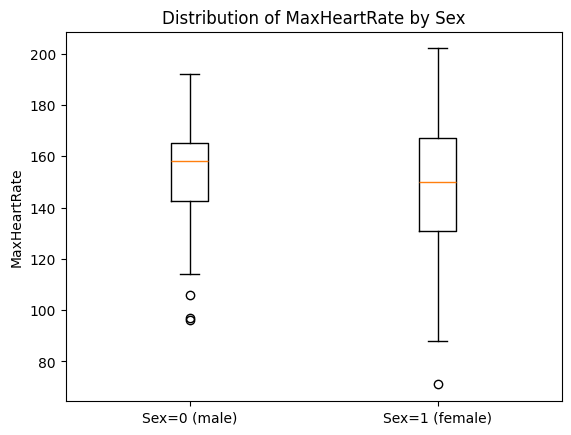

/var/folders/fk/p3fp_2yx76b4klldhhkn9t140000gn/T/ipykernel_48764/3528837001.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_male, data_female], labels=['Sex=0 (male)', 'Sex=1 (female)'])


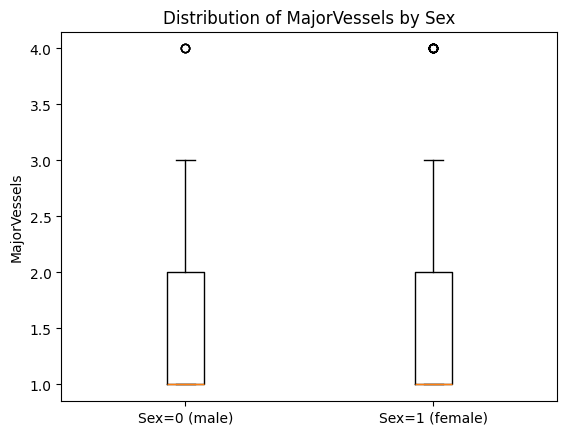

In [22]:

# Boxplots for continuous variables by sex
for var in real_vars:
    plt.figure()
    data_male = df[df['Sex'] == 0][var]
    data_female = df[df['Sex'] == 1][var]
    plt.boxplot([data_male, data_female], labels=['Sex=0 (male)', 'Sex=1 (female)'])
    plt.title(f"Distribution of {var} by Sex")
    plt.ylabel(var)
    plt.show()



### Sex-specific distributions

Comparing continuous variables by sex reveals no major differences: both males and females have similar age, resting blood pressure and serum cholesterol distributions. There is a slight tendency for females to have marginally lower resting blood pressure and higher maximum heart rates, but these differences are not pronounced in this exploratory view.
